In [1]:
import pandas as pd
import numpy as np
import os
import glob
import sys

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import seaborn as sns

import src.utils as my_u
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


file_list = glob.glob("./dataset/goolam/RAW/Goolam_et_al_2015_count_table.tsv")
print(file_list)

['./dataset/goolam/RAW/Goolam_et_al_2015_count_table.tsv']


In [2]:
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0, header=0)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = total_data.columns
labels = [x.split('cell')[0].split('_')[-1] for x in labels]
print(labels)


## ERCC cleaning
genes = total_data.index
ercc_list = []
for g in genes:
    if 'ERCC' in g:
        ercc_list.append(g)
#print(len(ercc_list))
print(total_data.shape)
total_data = total_data.drop(ercc_list, axis=0)
total_data=total_data.transpose()
print(total_data.shape)


(41480, 124)
['2', '2', '2', '2', '2', '2', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '16', '16', '16', '16', '16', '16', '32', '32', '32', '32', '32', '32', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
(41480, 124)
(124, 41388)


kmeans #cluster: 4 ARI: 0.13719050814174166 Silhouette: 0.55457276
kmeans #cluster: 4 ARI: 0.6194325247000851 Silhouette: 0.50145906
kmeans #cluster: 5 ARI: 0.27755999939197595 Silhouette: 0.49496585
kmeans #cluster: 4 ARI: 0.5597594462041997 Silhouette: 0.5208422
kmeans #cluster: 6 ARI: 0.18544256040322557 Silhouette: 0.4838824
kmeans #cluster: 4 ARI: 0.6021767020578722 Silhouette: 0.50115716
kmeans #cluster: 5 ARI: 0.25431197582491194 Silhouette: 0.5030304
kmeans #cluster: 8 ARI: 0.5647140485152784 Silhouette: 0.58388335


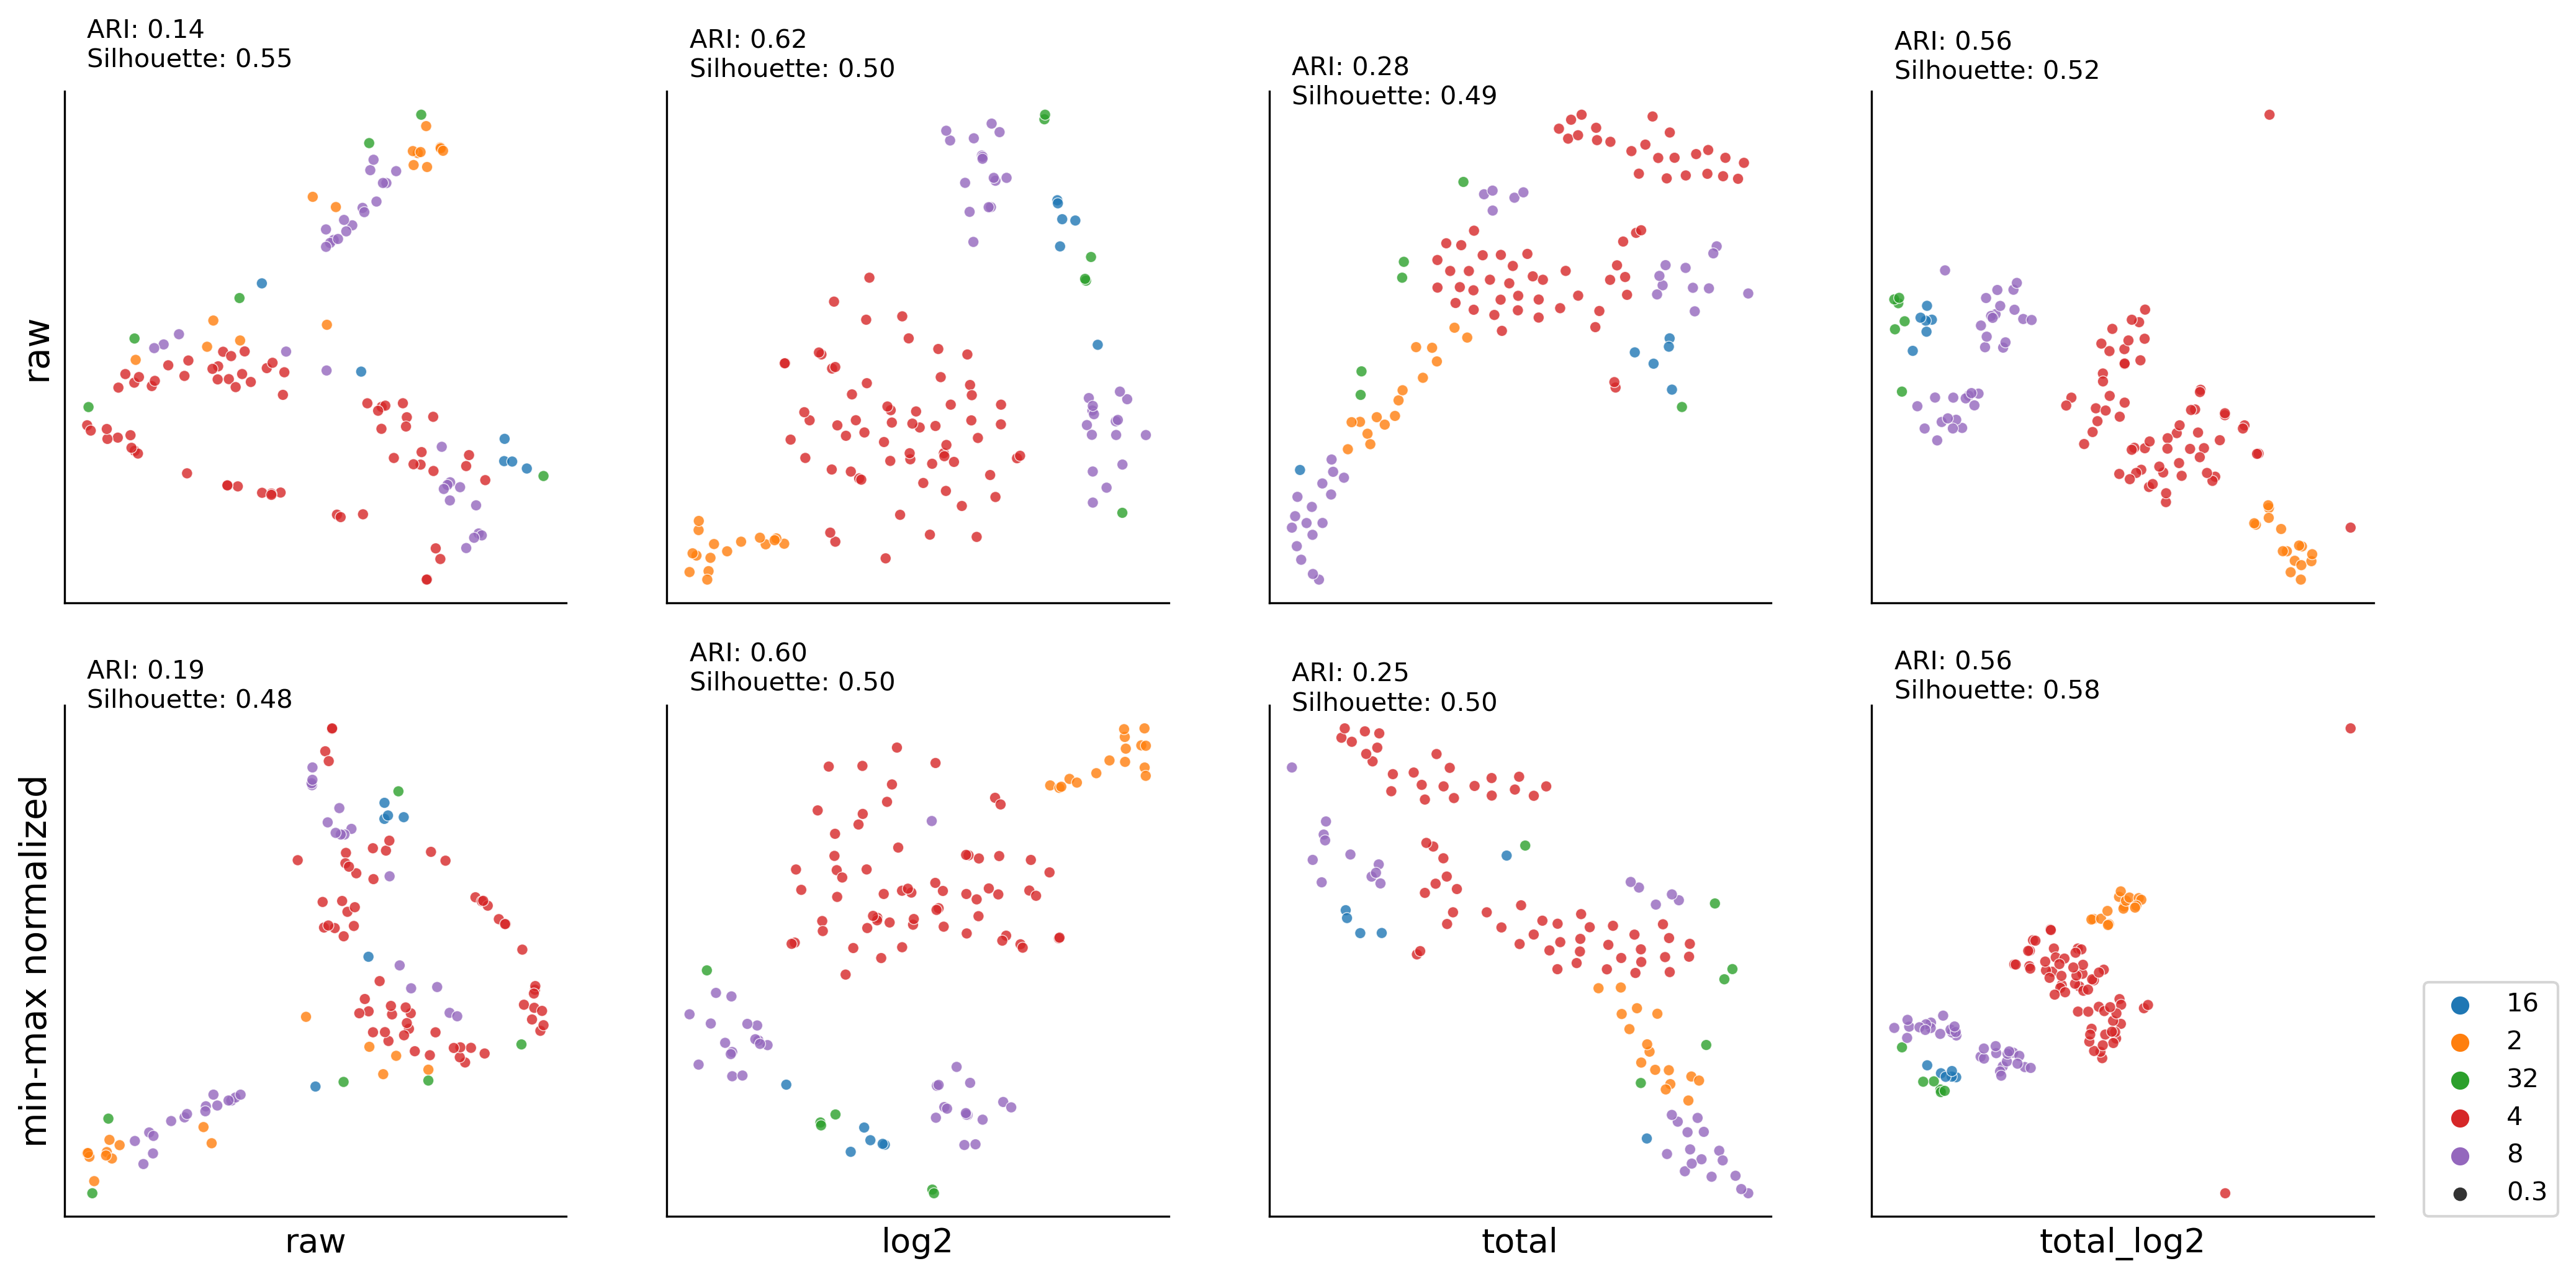

In [24]:
plt.figure(figsize=(16,8), dpi=300)
ax00 = plt.subplot2grid((2,4), (0,0)) 
ax10 = plt.subplot2grid((2,4), (0,1))  
ax20 = plt.subplot2grid((2,4), (0,2))  
ax30 = plt.subplot2grid((2,4), (0,3))  

ax01 = plt.subplot2grid((2,4), (1,0)) 
ax11 = plt.subplot2grid((2,4), (1,1))  
ax21 = plt.subplot2grid((2,4), (1,2))  
ax31 = plt.subplot2grid((2,4), (1,3))  


whole_exp = total_data
raw_result, raw_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(raw_df, raw_result, ax00, labels)
del(raw_result, raw_df)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
log2_result, log2_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(log2_df, log2_result, ax10, labels)
del(log2_result, log2_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
total_result, total_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(total_df, total_result, ax20, labels)
del(total_result, total_df)


#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
total_log2_result, total_log2_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(total_log2_df, total_log2_result, ax30, labels)
del(total_log2_result, total_log2_df)


whole_exp = total_data
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(mm_raw_df, mm_raw_result, ax01, labels)
del(mm_raw_result, mm_raw_df)

#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(mm_log2_df, mm_log2_result, ax11, labels)
del(mm_log2_result, mm_log2_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(mm_total_df, mm_total_result, ax21, labels)
del(mm_total_result, mm_total_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels)
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax31, labels)
del(mm_total_log2_result, mm_total_log2_df)

ax00.set_ylabel('raw' , fontsize=14)

ax01.set_xlabel('raw', fontsize=13)
ax11.set_xlabel('log2', fontsize=13)
ax21.set_xlabel('total', fontsize=13)
ax31.set_xlabel('total_log2', fontsize=13)
ax01.set_ylabel('min-max normalized' , fontsize=14)
ax31.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

dbscan #cluster: (4, 0.157071960559654, 0.503694)
dbscan #cluster: (5, 0.8485670989384952, 0.47518104)
dbscan #cluster: (5, 0.18830342891464713, 0.43085518)
dbscan #cluster: (6, 0.8718492131030471, 0.5221911)
dbscan #cluster: (2, 0.3211353309468896, 0.5654594)
dbscan #cluster: (5, 0.8485670989384952, 0.4703488)
dbscan #cluster: (5, 0.18093573767368265, 0.34403783)
dbscan #cluster: (6, 0.8718492131030471, 0.5206214)


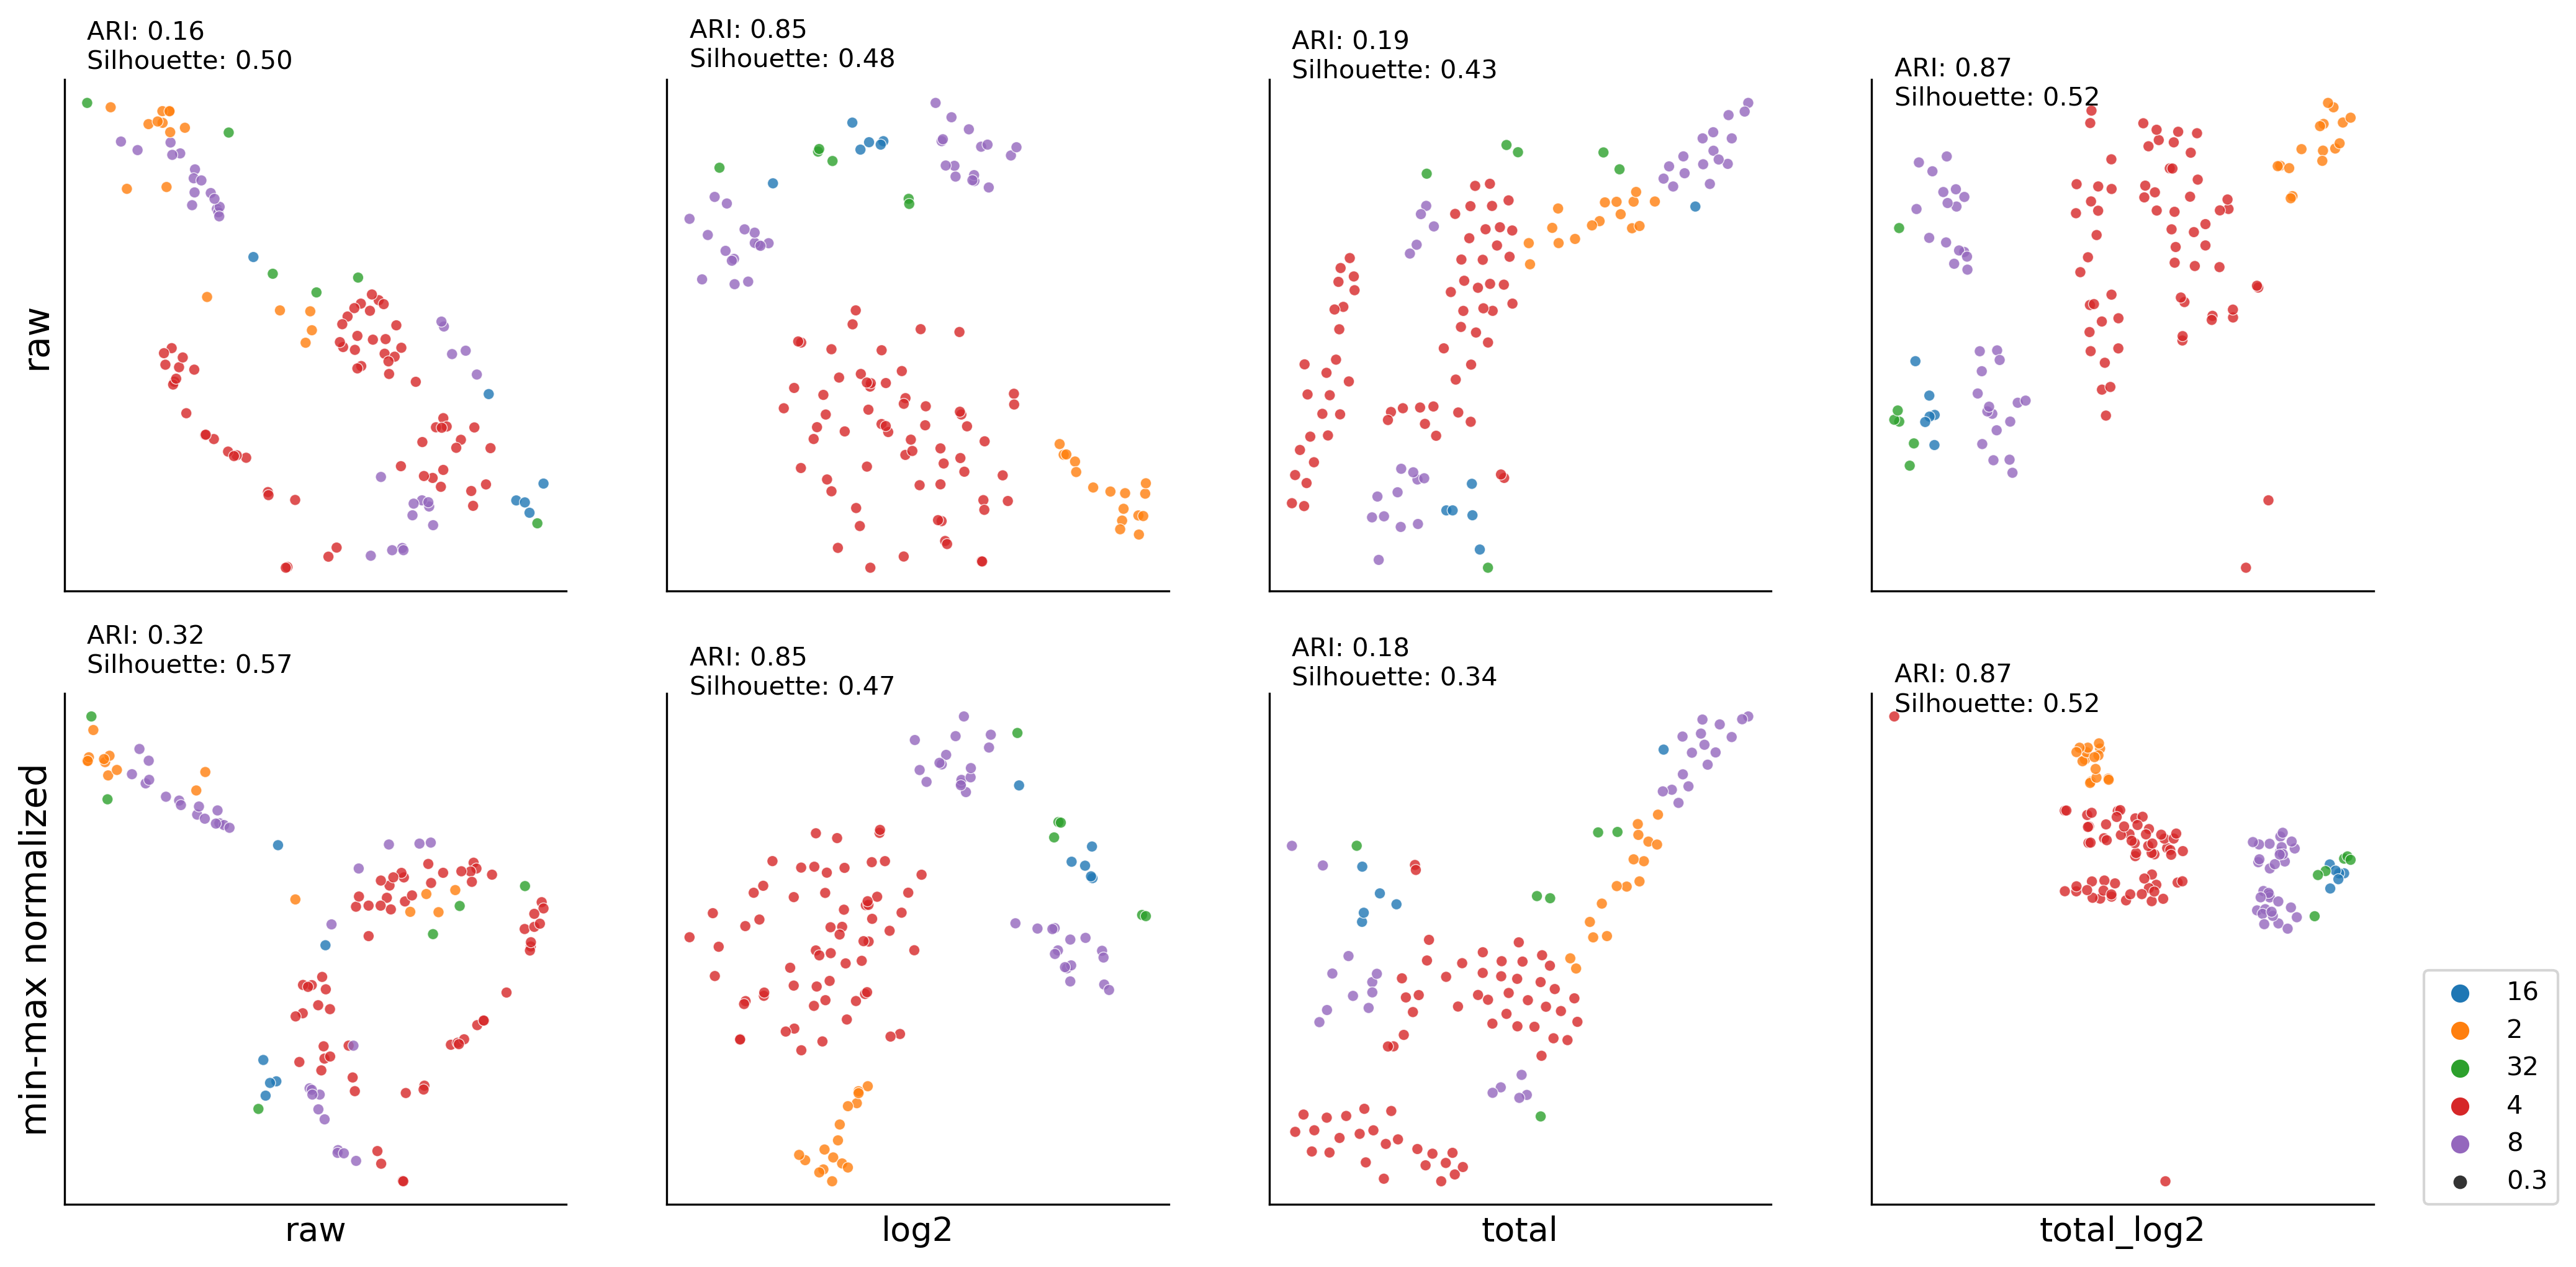

In [3]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(16,8), dpi=300)
ax00 = plt.subplot2grid((2,4), (0,0)) 
ax10 = plt.subplot2grid((2,4), (0,1))  
ax20 = plt.subplot2grid((2,4), (0,2))  
ax30 = plt.subplot2grid((2,4), (0,3))  

ax01 = plt.subplot2grid((2,4), (1,0)) 
ax11 = plt.subplot2grid((2,4), (1,1))  
ax21 = plt.subplot2grid((2,4), (1,2))  
ax31 = plt.subplot2grid((2,4), (1,3))  


whole_exp = total_data
raw_result, raw_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(raw_df, raw_result, ax00, labels)
del(raw_result, raw_df)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
log2_result, log2_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(log2_df, log2_result, ax10, labels)
del(log2_result, log2_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
total_result, total_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(total_df, total_result, ax20, labels)
del(total_result, total_df)


#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
total_log2_result, total_log2_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(total_log2_df, total_log2_result, ax30, labels)
del(total_log2_result, total_log2_df)


whole_exp = total_data
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(mm_raw_df, mm_raw_result, ax01, labels)
del(mm_raw_result, mm_raw_df)

#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(mm_log2_df, mm_log2_result, ax11, labels)
del(mm_log2_result, mm_log2_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels, 'dbscan')
my_u.draw_plot(mm_total_df, mm_total_result, ax21, labels)
del(mm_total_result, mm_total_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax31, labels)
del(mm_total_log2_result, mm_total_log2_df)

ax00.set_ylabel('raw' , fontsize=14)

ax01.set_xlabel('raw', fontsize=13)
ax11.set_xlabel('log2', fontsize=13)
ax21.set_xlabel('total', fontsize=13)
ax31.set_xlabel('total_log2', fontsize=13)
ax01.set_ylabel('min-max normalized' , fontsize=14)
ax31.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

kmean #cluster: (7, 0.241540068320893, 0.5012584)
kmean #cluster: (3, 0.7150820285104929, 0.5159175)
kmean #cluster: (3, 0.22946606111630388, 0.59455293)
kmean #cluster: (3, 0.7542850528240237, 0.52882004)
dbscan #cluster: (4, 0.24054316109484808, 0.36601856)
dbscan #cluster: (6, 0.8625073042695252, 0.44250455)
dbscan #cluster: (4, 0.22767939732837356, 0.36806688)
dbscan #cluster: (5, 0.9004547436184451, 0.4973784)


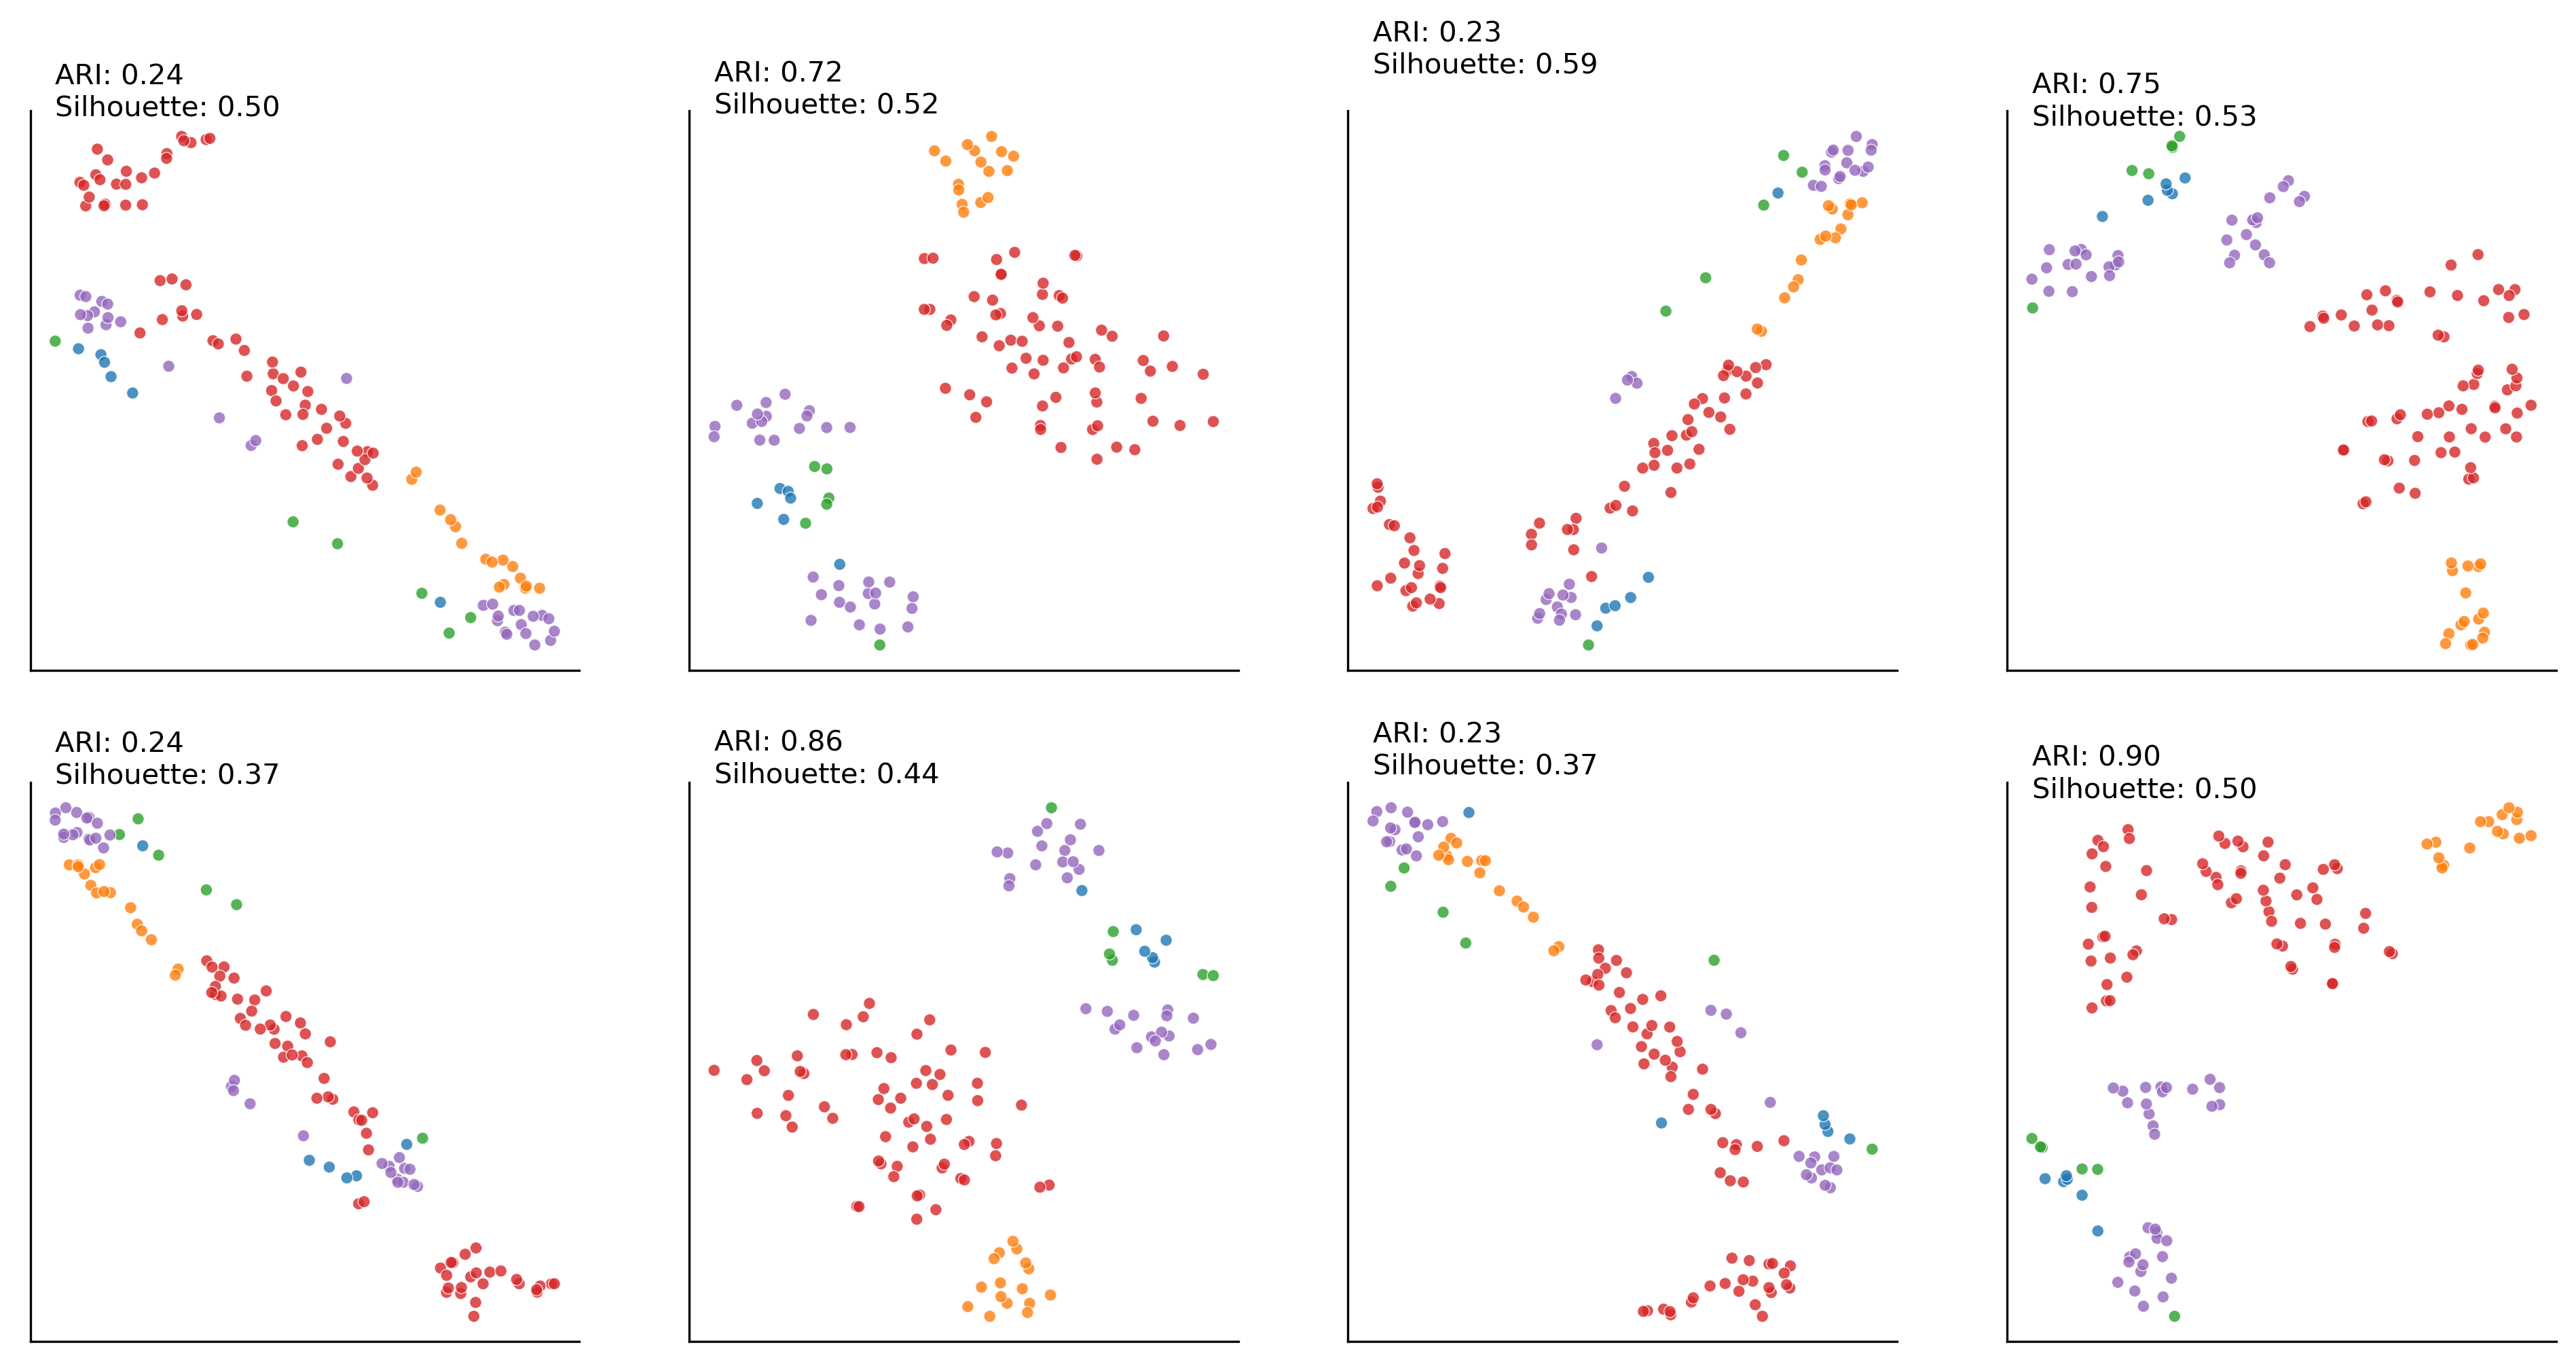

In [4]:
plt.figure(figsize=(16,8), dpi=300)
ax00 = plt.subplot2grid((2,4), (0,0)) 
ax10 = plt.subplot2grid((2,4), (0,1))  
ax20 = plt.subplot2grid((2,4), (0,2))  
ax30 = plt.subplot2grid((2,4), (0,3))  

ax01 = plt.subplot2grid((2,4), (1,0)) 
ax11 = plt.subplot2grid((2,4), (1,1))  
ax21 = plt.subplot2grid((2,4), (1,2))  
ax31 = plt.subplot2grid((2,4), (1,3))  







whole_exp = total_data
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels, cluster='kmean')
my_u.draw_plot(mm_raw_df, mm_raw_result, ax00, labels)
del(mm_raw_result, mm_raw_df)

#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels, cluster='kmean')
my_u.draw_plot(mm_log2_df, mm_log2_result, ax10, labels)
del(mm_log2_result, mm_log2_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels, 'kmean')
my_u.draw_plot(mm_total_df, mm_total_result, ax20, labels)
del(mm_total_result, mm_total_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels, cluster='kmean')
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax30, labels)
del(mm_total_log2_result, mm_total_log2_df)






whole_exp = total_data
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(mm_raw_df, mm_raw_result, ax01, labels)
del(mm_raw_result, mm_raw_df)

#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(mm_log2_df, mm_log2_result, ax11, labels)
del(mm_log2_result, mm_log2_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels, 'dbscan')
my_u.draw_plot(mm_total_df, mm_total_result, ax21, labels)
del(mm_total_result, mm_total_df)

#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
whole_exp = ((whole_exp.transpose() - whole_exp.min(1))/(whole_exp.max(1)-whole_exp.min(1)))
whole_exp = whole_exp.transpose()
whole_exp = whole_exp.replace(np.nan,0) 
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels, cluster='dbscan')
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax31, labels)
del(mm_total_log2_result, mm_total_log2_df)